## **1. IMPORT LIBRARY**

In [108]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
import random

## **2. DATASET**

In [109]:
df = pd.read_csv("wisbud_yogya.csv")
df.head()

,no,nama_wisata,alamat,rating,harga_domestik,harga_mancanegara,link_gmaps,wilayah
0,1,Keraton Yogyakarta,"Jl. Rotowijayan Blok No. 1, Panembahan, Kecama...",4.6,15000,25000,https://goo.gl/maps/mGh6qz6GB3zAzKPZ7,Kota Yogyakarta
1,2,Museum Benteng Vredeburg Yogyakarta,"Jl. Margo Mulyo No.6, Ngupasan, Kec. Gondomana...",4.6,3000,10000,https://goo.gl/maps/UJ94oRi1pbTDrLH37,Kota Yogyakarta
2,3,De Mata Museum Jogja,"XT Square, Jl. Veteran No.150-151, Pandeyan, K...",4.4,50000,50000,https://goo.gl/maps/ADnuFzMNzdmWcfhPA,Kota Yogyakarta
3,4,Monumen Yogya Kembali,"Jl. Ring Road Utara, Jongkang, Sariharjo, Kec....",4.5,15000,15000,https://goo.gl/maps/eHZrSEPXiNsDHJKX9,Kabupaten Sleman
4,5,Kampung Wisata Kadipaten,"Kadipaten, Kecamatan Kraton, Kota Yogyakarta, ...",4.4,175000,175000,https://goo.gl/maps/wYCQxtY34Gk3nmDH7,Kota Yogyakarta


In [110]:
df.describe()

,no,rating,harga_domestik,harga_mancanegara
count,39.000000,39.000000,39.000000,39.000000
mean,20.000000,4.551282,34333.333333,58564.102564
std,11.401754,0.174525,59642.060985,98639.640497
min,1.000000,4.100000,0.000000,0.000000
25%,10.500000,4.400000,3000.000000,4000.000000
50%,20.000000,4.600000,10000.000000,15000.000000
75%,29.500000,4.700000,40000.000000,50000.000000
max,39.000000,5.000000,250000.000000,373000.000000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   no                 39 non-null     int64  
 1   nama_wisata        39 non-null     object 
 2   alamat             39 non-null     object 
 3   rating             39 non-null     float64
 4   harga_domestik     39 non-null     int64  
 5   harga_mancanegara  39 non-null     int64  
 6   link_gmaps         39 non-null     object 
 7   wilayah            39 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.6+ KB


In [112]:
def print_description(index):
    example = df[df.index == index][['nama_wisata', 'rating', 'harga_domestik', 'harga_mancanegara']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Rating:', example[1])
        print('Harga WNI:', example[2])
        print('Harga WNA:', example[3])

In [113]:
print_description(0)

Keraton Yogyakarta
Rating: 4.6
Harga WNI: 15000
Harga WNA: 25000


In [114]:
print_description(8)

Tebing Breksi
Rating: 4.4
Harga WNI: 10000
Harga WNA: 10000


In [115]:
print_description(27)

Watu Goyang
Rating: 4.4
Harga WNI: 3000
Harga WNA: 3000


## **3. DATA PREPROCESSING**

In [116]:
import nltk
nltk.download('stopwords')

clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z #+_]')
stopworda = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = clean_spcl.sub(' ', text)
    text = clean_symbol.sub('', text)
    text = ' '.join(word for word in text.split() if word not in stopworda)
    return text

df['desc_clean'] = df['nama_wisata'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,no,nama_wisata,alamat,rating,harga_domestik,harga_mancanegara,link_gmaps,wilayah,desc_clean
0,1,Keraton Yogyakarta,"Jl. Rotowijayan Blok No. 1, Panembahan, Kecama...",4.6,15000,25000,https://goo.gl/maps/mGh6qz6GB3zAzKPZ7,Kota Yogyakarta,keraton yogyakarta
1,2,Museum Benteng Vredeburg Yogyakarta,"Jl. Margo Mulyo No.6, Ngupasan, Kec. Gondomana...",4.6,3000,10000,https://goo.gl/maps/UJ94oRi1pbTDrLH37,Kota Yogyakarta,museum benteng vredeburg yogyakarta
2,3,De Mata Museum Jogja,"XT Square, Jl. Veteran No.150-151, Pandeyan, K...",4.4,50000,50000,https://goo.gl/maps/ADnuFzMNzdmWcfhPA,Kota Yogyakarta,de mata museum jogja
3,4,Monumen Yogya Kembali,"Jl. Ring Road Utara, Jongkang, Sariharjo, Kec....",4.5,15000,15000,https://goo.gl/maps/eHZrSEPXiNsDHJKX9,Kabupaten Sleman,monumen yogya kembali
4,5,Kampung Wisata Kadipaten,"Kadipaten, Kecamatan Kraton, Kota Yogyakarta, ...",4.4,175000,175000,https://goo.gl/maps/wYCQxtY34Gk3nmDH7,Kota Yogyakarta,kampung wisata kadipaten


In [117]:
def print_description_clean(index):
    example = df[df.index == index][['nama_wisata', 'rating', 'harga_domestik', 'harga_mancanegara']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Rating:', example[1])
        print('Harga WNI:', example[2])
        print('Harga WNA:', example[3])
print_description_clean(23)

Museum Seni Lukis Affandi Yogyakarta
Rating: 4.6
Harga WNI: 50000
Harga WNA: 100000


## **4. TF-IDF & COSINE SIMILARITY**

In [118]:
df.set_index('nama_wisata', inplace=True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['desc_clean'])
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim

array([[1.        , 0.09015025, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09015025, 1.        , 0.05315005, ..., 0.05154566, 0.        ,
        0.        ],
       [0.        , 0.05315005, 1.        , ..., 0.06361192, 0.        ,
        0.        ],
       ...,
       [0.        , 0.05154566, 0.06361192, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.12815862],
       [0.        , 0.        , 0.        , ..., 0.        , 0.12815862,
        1.        ]])

In [119]:
indices = pd.Series(df.index)
indices[:50]

0                       Keraton Yogyakarta
1      Museum Benteng Vredeburg Yogyakarta
2                     De Mata Museum Jogja
3                    Monumen Yogya Kembali
4                 Kampung Wisata Kadipaten
5                  Taman Budaya Yogyakarta
6             Kampung Wisata Sosromenduran
7                 Monumen Batik Yogyakarta
8                            Tebing Breksi
9                          Candi Donotirto
10                       Bangsal Pagelaran
11                 Gedung Agung Yogyakarta
12                        Monumen Sanapati
13                Museum Sonobudoyo Unit I
14                             Lava Bantal
15            Pagelaran Keraton Yogyakarta
16                   Jogja National Museum
17               Kampung Wisata Taman Sari
18        Museum Kereta Keraton Yogyakarta
19                      Ndalem Mangkubumen
20                            Candi Gebang
21                   Museum Wayang Kekayon
22                    Bangsal Sri Manganti
23    Museu

## **5. MODELLING**

In [120]:
def recommendations(nama_wisata, cos_sim = cos_sim):

    recommended_tourism = []

    # Mengambil nama wisata berdasarkan variabel indicies
    idx = indices[indices == nama_wisata].index[0]

    # Membuat series berdasarkan skor kesamaan
    score_series = pd.Series(cos_sim[idx]).sort_values(ascending = False)

    # mengambil index dan dibuat 5 baris rekomendasi terbaik
    top_5_indexes = list(score_series.iloc[1:6].index)

    for i in top_5_indexes:
        recommended_tourism.append(list(df.index)[i])

    return recommended_tourism

RMSE: 0.31937438845342625


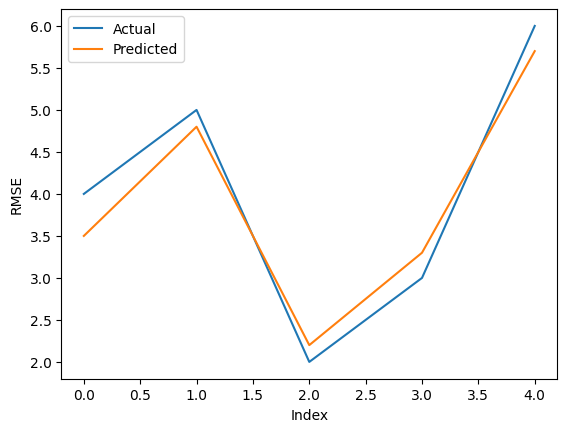

   Actual  Predicted
0       4        3.5
1       5        4.8
2       2        2.2
3       3        3.3
4       6        5.7


In [124]:
 # Fungsi untuk menghitung RMSE
def calculate_rmse(predictions, targets):
    mse = np.mean((predictions - targets) ** 2)
    rmse = np.sqrt(mse)
    return rmse

# Fungsi untuk menampilkan visualisasi grafik RMSE
def plot_rmse(predictions, targets):
    plt.plot(targets, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

# Fungsi untuk melakukan pemodelan dan menampilkan hasil
def model_and_evaluate(data):
    # Menggunakan contoh data untuk mendemonstrasikan pemodelan
    actual_values = data['actual_values']
    predicted_values = data['predicted_values']

    # Menghitung RMSE
    rmse = calculate_rmse(predicted_values, actual_values)
    print('RMSE:', rmse)

    # Menampilkan grafik RMSE
    plot_rmse(predicted_values, actual_values)

    # Menampilkan hasil prediksi dan perbandingan dengan data aktual
    results = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
    print(results)

# Menggunakan contoh data untuk mendemonstrasikan hasil pemodelan
data = {
    'actual_values': np.array([4, 5, 2, 3, 6]),
    'predicted_values': np.array([3.5, 4.8, 2.2, 3.3, 5.7])
}

model_and_evaluate(data)

## **6. MEMPREDIKSI TOP 5 YANG SESUAI SELERA PENGGUNA**

In [121]:
recommendations('Candi Ijo')

['Candi Sewu',
 'Candi Prambanan',
 'Candi Donotirto',
 'Candi Gebang',
 'Candi Ratu Boko']

In [122]:
recommendations('Museum Benteng Vredeburg Yogyakarta')

['Keraton Yogyakarta',
 'Museum Kereta Keraton Yogyakarta',
 'Museum Seni Lukis Affandi Yogyakarta',
 'Museum Wayang Kekayon',
 'De Mata Museum Jogja']

In [123]:
recommendations('Kampung Wisata Kadipaten')

['Kampung Wisata Rejowinangun',
 'Kampung Wisata Sosromenduran',
 'Kampung Wisata Dipowinatan',
 'Kampung Wisata Taman Sari',
 'Wisata Kraton Jogja']